In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import tensorflow as tf
import sys
import random
import dataset

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.applications import vgg16
from matplotlib import pyplot as plt
import itertools
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
IMAGE_SIZE = 100
NUM_FOR_TRAIN = 50000
NUM_FOR_EVAL = 10000


train_path = 'fruits/fruits-360/Training/'
test_path =  'fruits/fruits-360/Test/'

CLASSES = ["Apple Braeburn", "Apple Golden 1", "Apple Golden 2", "Apple Golden 3",
            "Apple Granny Smith", "Apple Red 1", "Apple Red 2", "Apple Red 3",
           "Apple Red Delicious", "Apple Red Yellow", "Apricot","Avocado", "Avocado Ripe",  "Banana", "Banana Red", "Cactus Fruit",
            "Carambula", "Cherry", "Clementine", "Cocos","Dates", "Granadilla", "Grape Pink", "Grape White", "Grape White 2",
            "Grapefruit Pink", "Grapefruit White","Guava", "Huckleberry", "Kaki","Kiwi",  "Kumquats", "Lemon", "Lemon Meyer", "Lime", "Lychee", "Mandarin", "Mango", 
            "Maracuja",  "Nectarine", "Orange", "Papaya", "Passion Fruit", "Peach", "Peach Flat", "Pear", "Pear Abate", "Pear Monster", "Pear Williams",
           "Pepino", "Pineapple", "Pitahaya Red", "Plum", "Pomegranate", "Quince", "Raspberry",
            "Salak", "Strawberry", "Tamarillo", "Tangelo"]



In [ ]:
 
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(CLASSES), activation='softmax'))
     
    return model

In [12]:
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
__________

In [13]:
split = ImageDataGenerator(validation_split = 0.1)

train_batch = split.flow_from_directory(train_path, subset = 'training', target_size=(IMAGE_SIZE,IMAGE_SIZE),classes=CLASSES, batch_size=100 )
validation_batch = split.flow_from_directory(train_path, subset = 'validation', target_size=(IMAGE_SIZE,IMAGE_SIZE),classes=CLASSES, batch_size=100 )
test_batch = ImageDataGenerator().flow_from_directory(test_path, target_size=(IMAGE_SIZE,IMAGE_SIZE),classes=CLASSES, batch_size=15 )


Found 24988 images belonging to 60 classes.
Found 2768 images belonging to 60 classes.
Found 9341 images belonging to 60 classes.


In [14]:

# batch_size = 256
# epochs = 100
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
# history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
#                    validation_data=(test_data, test_labels_one_hot))
 
# model1.evaluate(test_data, test_labels_one_hot)

In [15]:

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
            
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [16]:
# model = Sequential([Conv2D(32, (4,4), activation='relu', input_shape=(244,244,3)), Flatten(), Dense(len(CLASSES), activation='softmax')])

In [17]:
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_batch,steps_per_epoch=2499, validation_data=validation_batch, validation_steps=277, epoch=5, verbose=2)

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=250, validation_data=validation_batch, validation_steps=28 ,epochs=100, verbose=2)



Epoch 1/100
 - 3207s - loss: 15.8330 - acc: 0.0176 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 2/100
 - 2359s - loss: 15.8333 - acc: 0.0177 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 3/100
 - 2636s - loss: 15.8338 - acc: 0.0176 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 4/100
 - 4393s - loss: 15.8335 - acc: 0.0177 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 5/100
 - 24404s - loss: 15.8336 - acc: 0.0177 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 6/100
 - 2709s - loss: 15.8337 - acc: 0.0176 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 7/100
 - 1863s - loss: 15.8336 - acc: 0.0177 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 8/100
 - 2053s - loss: 15.8336 - acc: 0.0177 - val_loss: 15.8328 - val_acc: 0.0177
Epoch 9/100


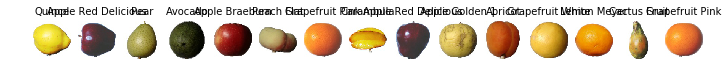

In [11]:
# predict
test_images, test_labels = next(test_batch)

new_labels = []

test_labels = test_labels[:]
for label in test_labels:
    itemindex = np.where(label==1) 
    new_labels.append(CLASSES[itemindex[0][0]])
    
plots(test_images, titles=new_labels)


In [12]:
predictions = model.predict_generator(test_batch, steps=1, verbose=0)

In [ ]:
# LOSS AND ACCURACY MODELS

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
# vgg16 model
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
vgg16_model

In [ ]:
type(vgg16_model)


In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
# take off last layer to change from 1000 outputs to 60 (number of fruits)

model.layers.pop()

In [ ]:
model.summary()
for layer in model.layers:
    layer.trainable = False

In [ ]:
# add dense layer with 60 outputs
model.add(Dense(60, activation='softmax'))

model.summary()

In [ ]:
# using vgg16 model

model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=250, validation_data=validation_batch, validation_steps=28, epochs=2, verbose=2)